<a href="https://colab.research.google.com/github/hajju0617/Data-Analysis-Study/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ↓ 통계적 모형을 활용한 분석 (statsmodels)


In [ ]:
import pandas as pd
import random
# statsmodels의 formula api
import statsmodels.formula.api as smf

# 난수 시드 설정.
random.seed(1)

X = list(range(1, 11))
y = [2*x + 1 + random.gauss(0, 1) for x in X]
data = pd.DataFrame({'X': X, 'y': y})

# OLS(최소 제곱법) 선형 회귀 모델 생성 및 학습.
# y: 종속 변수, X: 독립 변수. (하단 '~(틸다)'기준으로 왼쪽이 종속 변수, 오른쪽이 독립 변수.)
model = smf.ols(formula='y ~ X', data=data).fit()    # 선형 회귀 모델을 OLS 방법으로 생성. 학습을 위해 'fit()'함수 사용.

# 모델 요약 결과 출력.
print(model.summary())

'''
R-squared(결정계수): 해당 값이 1에 가까울수록 모델이 정확하게 데이터를 묘사했다는 의미.
'''

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     345.0
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           7.28e-08
Time:                        13:17:06   Log-Likelihood:                -12.020
No. Observations:                  10   AIC:                             28.04
Df Residuals:                       8   BIC:                             28.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7622      0.615      2.866      0.0

'\nR-squared(결정계수): 해당 값이 1에 가까울수록 모델이 정확하게 데이터를 묘사했다는 의미.\n'

### ↓ 기계학습을 활용한 분석 (scikit-learn)

In [ ]:
# scikit-learn의 앙상블(ensemble) 알고리즘 중 RandomForestClassifier(랜덤포레스트 분류기)
from sklearn.ensemble import RandomForestClassifier
# 모델 평가를 위한 데이터 분할(split) 함수.
from sklearn.model_selection import train_test_split
# 모델의 정확도(accuracy)르르 측정하는 함수.
from sklearn.metrics import accuracy_score
# 예제 데이터셋(유방암 데이터) 로드 함수.
from sklearn.datasets import load_breast_cancer

# 데이터 로드 및 분할.
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# 학습/테스트 데이터셋 분할.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성. (기본값 대신 결정 트리의 개수를 100으로 설정 -> 성능 향상, n_estimators=100)
model = RandomForestClassifier(n_estimators=100)
# 모델 학습. (입력 데이터, 결과 데이터)
model.fit(X_train, y_train)

# 예측 및 정확도 평가.
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

'''
accuracy: 사용한 성능 평가.
96%의 정확도를 보임.

결정 트리의 개수를 100으로 설정
97%의 정확도.
'''

0.9649122807017544


'\naccuracy: 사용한 성능 평가.\n96%의 정확도를 보임.\n\n결정 트리의 개수를 100으로 설정\n97%의 정확도.\n'

### ↓ 딥러닝을 활용한 분석 (tensorflow)
=> colab 환경에서 실행시 '런타임' -> '런타임 유형 변경' -> 'T4 GPU'설정.

In [ ]:
from sklearn.metrics import classification_report
# 딥러닝 분석을 위한 tensorflow
import tensorflow as tf

# CIFAR-10 데이터셋 로드 및 전처리.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# MobileNetV2 기반 모델 구축.
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
base_model.trainable = False
model = tf.keras.Sequential([
    tf.keras.layers.Resizing(160, 160),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])

# 모델 컴파일.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),              # 모델 학습 과정
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # 학습 방법론
              metrics=['accuracy'])

# 모델 학습.
model.fit(x_train, y_train, epochs=3, validation_split=0.2)

# 예측 및 성능 평가.
y_pred = tf.argmax(model.predict(x_test), axis=1)
print("\nTest Accuracy:", model.evaluate(x_test, y_test, verbose=0)[1])
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.6931 - loss: 0.9058 - val_accuracy: 0.8053 - val_loss: 0.5673
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.8245 - loss: 0.5111 - val_accuracy: 0.8170 - val_loss: 0.5297
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.8370 - loss: 0.4661 - val_accuracy: 0.8266 - val_loss: 0.5044
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step

Test Accuracy: 0.8226000070571899

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1000
           1       0.90      0.92      0.91      1000
           2       0.78      0.76      0.77      1000
           3       0.63      0.77      0.69      1000
           4       0.78      0.78      0.78      1000
           5       0.87      0.66      0.75      1000
           6       0.85      0.88      0.86      1000
           7       0.85      0.85      0.85      1000
           8     

### ↓ EDA 예시

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


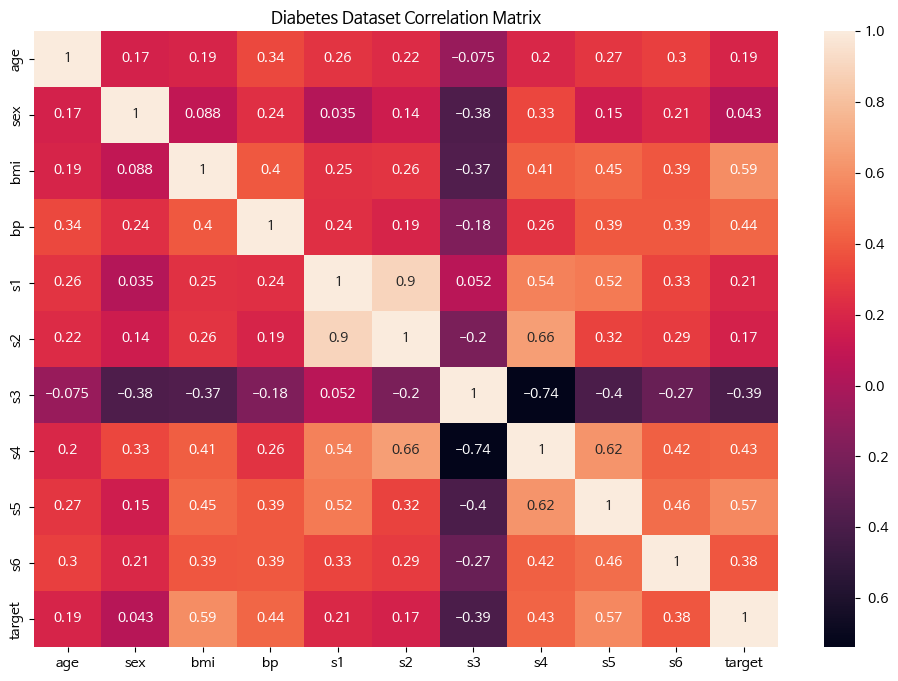

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# 당뇨병 데이터셋 로드 및 데이터프레임 생성.
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# dataframe의 describe를 이용하여 기본 통계량 출력.
print(df.describe())

# 상관 행렬 시각화.
plt.figure(figsize=(12,8))
# dataframe의 각 열(변수)들 간의 상관 계수(correlation coefficient)를 계산하고 corr_matrix로 저장.
corr_matrix = df.corr()
# seaborn으로 corr_matrix를 heatmap으로 시각화. (annot=True: 히트맵에서 수치값 확인)
sns.heatmap(corr_matrix, annot=True)


plt.title('Diabetes Dataset Correlation Matrix')
plt.show()

### ↓ 기술통계량 분석.

In [ ]:
import pandas as pd
import seaborn as sns

# 아이리스 데이터셋 로드.
df = sns.load_dataset('iris')

# 기술 통계량.
print("=== 기본 통계량 ===")
print(df.describe())

# 데이터 미리보기.
print("\n=== 데이터 미리보기 ===")
print(df.head())

# 그룹별 통계정보.
print("\n=== 품종별 평균값 ===")
print(df.groupby('species').mean())

=== 기본 통계량 ===
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

=== 데이터 미리보기 ===
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

=== 품종별 평균값 ===
            sepal_length  

### ↓ 데이터 시각화.

In [ ]:
# 한글 처리를 위한 matplotlib 설정.
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

# colab -> 런타임 -> 세션 다시 시작.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


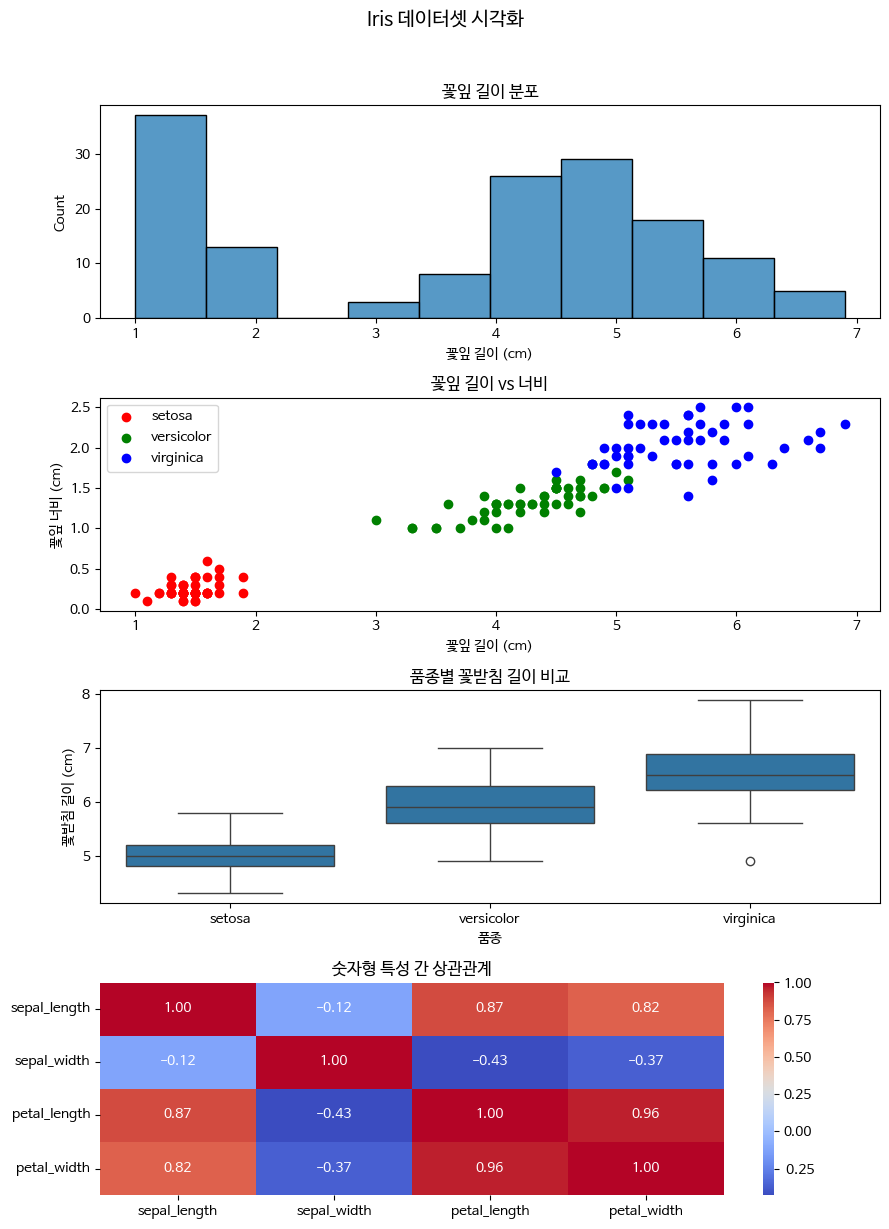

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 아이리스 데이터셋 로드.
df = sns.load_dataset('iris')

# 서브플롯 설정.
plt.figure(figsize=(9, 12))
plt.suptitle('Iris 데이터셋 시각화', y=1.02, fontsize=14)

# 첫 번째 서브플롯: 꽃잎 길이 분포. 4행 1열 1인덱스 (히스토그램)
plt.subplot(4, 1, 1)
# seaborn을 이용하여 petal_length를 10개 구간으로 나누어 히스토그램 표시.
sns.histplot(df['petal_length'], bins=10)
plt.title('꽃잎 길이 분포')
plt.xlabel('꽃잎 길이 (cm)')

# 두 번째 서브플롯: 꽃잎 길이 vs 너비. 4행 1열 2인덱스 (산점도)
plt.subplot(4, 1, 2)
species_list = df['species'].unique()
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

for species in species_list:
    species_data = df[df['species'] == species]
    # matplotlib를 이용하여 길이, 넓이를 산점도로 표시.
    plt.scatter(
        species_data['petal_length'], species_data['petal_width'],
        c=colors[species], label=species
    )
plt.title('꽃잎 길이 vs 너비')
plt.xlabel('꽃잎 길이 (cm)')
plt.ylabel('꽃잎 너비 (cm)')
plt.legend()

# 세 번째 서브플롯: 품종별 꽃받침 길이. 4행 1열 3인덱스 (박스플롯)
plt.subplot(4, 1, 3)
# seaborn을 이용하여 품종 별 꽃받침 길이를 박스플롯으로 표시.
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('품종별 꽃받침 길이 비교')
plt.xlabel('품종')
plt.ylabel('꽃받침 길이 (cm)')

# 네 번째 서브플롯: 숫자형 특성 간 상관관계. 4행 1열 4인덱스 (히트맵)
plt.subplot(4, 1, 4)
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('숫자형 특성 간 상관관계')

# 레이아웃 조정 및 그래프 표시.
plt.tight_layout()
plt.show()

### ↓ 자동화된 EDA 도구

In [ ]:
!pip install ydata_profiling

In [ ]:
import seaborn as sns
from ydata_profiling import ProfileReport

# 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

# 데이터 프로파일링 보고서 생성
profile = ProfileReport(df, title='보고서')

# HTML 파일로 보고서 저장
profile.to_file('report.html')

# 보고서 표시 (Jupyter Notebook 환경에서 보고서가 바로 표시됨)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 148.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]